C:\Users\joao.carvalho\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


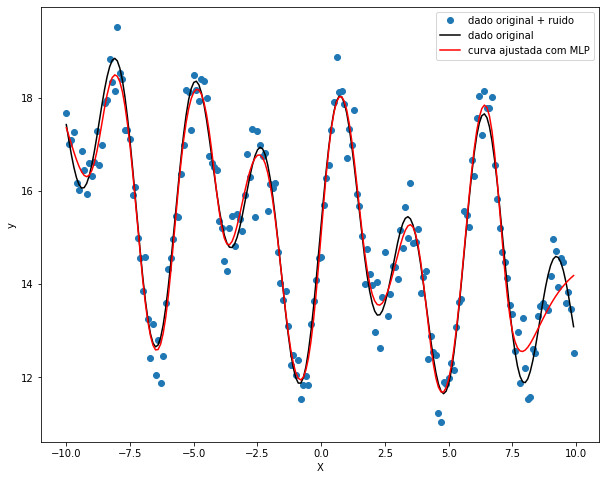

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor # importa classe MLPRegressor do modulo neural network

%matplotlib inline
x = np.arange(-10, 10, 0.1)

# dados originais
y = 12 + 3 * np.exp(-0.05*x) + 1.4 * np.sin(1.2*x) + 2.1 * np.sin(-2.2*x + 3)

# faz com que o gerador de numeros aleatorios sempre forneca os mesmos valores
np.random.seed(42)

# adicionando ruido aos dados originais
y_noise = y + np.random.normal(0, 0.5, size = len(y))

# trata o ajuste de curva como um problema de regressao e treina um modelo para que se ajuste aos dados.
mlp = MLPRegressor(hidden_layer_sizes=(30,20,10), max_iter=10000, solver='lbfgs', alpha=0.9, activation='tanh')
yfit = mlp.fit(x[:, None], y_noise).predict(x[:, None])

plt.figure(figsize = (10,8))
plt.plot(x, y_noise, 'o', label = 'dado original + ruido')
plt.plot(x, y, 'k', label = 'dado original')
plt.plot(x, yfit, '-r', label = 'curva ajustada com MLP', zorder = 10)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')

# salva figura em arquivo
plt.savefig('mlp_regression.png')